# Augmentator

In [11]:
%matplotlib inline
import numpy as np
import image_tools as imt
from augmentator import Augmentator
from timeit import default_timer as timer

In [7]:
%%time
image_shape = [128,128,3]
image_path  = "/netforge/datasets/private/roman/coins/2017-11-29/images"
aug         = Augmentator()
ethalons    = imt.load(image_path)
ethalons    = imt.resize(ethalons, image_shape)
print(ethalons.dtype, ethalons.shape)

uint8 (6107, 128, 128, 3)
CPU times: user 4.84 s, sys: 184 ms, total: 5.02 s
Wall time: 5.02 s


## Test performance

In [16]:
%%time
start = timer()
images = aug.augment(ethalons)
images = imt.grayscale(images)
t = timer() - start

print("Performance: %.1f ips" % (len(images)/t))
print('-'*50)
print(images.dtype, images.shape)

Performance: 162.0 ips
--------------------------------------------------
float16 (6107, 128, 128, 1)
CPU times: user 38.1 s, sys: 11.1 s, total: 49.2 s
Wall time: 37.7 s


## Test quality

CPU times: user 3.3 s, sys: 272 ms, total: 3.58 s
Wall time: 3.28 s


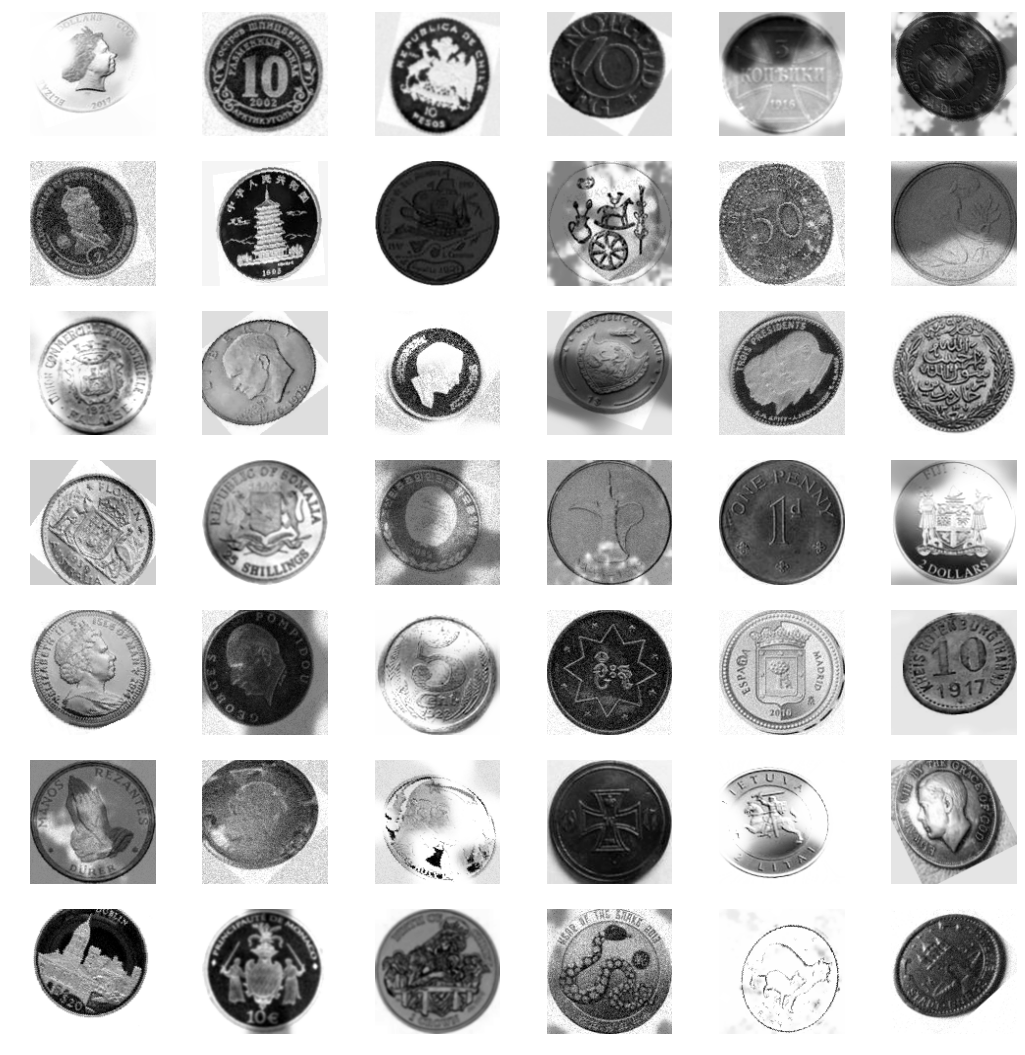

In [15]:
%%time
aug    = Augmentator()
images = imt.choice(ethalons, 42)
images = aug.augment(images)
images = imt.grayscale(images)
imt.plot(images, 6)